# Mallows 3 first

In [1]:
from math import prod
import sympy
import numpy as np
from actinvoting import *

In [2]:
m = 3
phi = sympy.Rational(50, 100)
rho = - np.log(float(phi))
rho

np.float64(0.6931471805599453)

In [3]:
culture = CultureMallows(m=m, phi=phi)
session = WorkSession(culture=culture, c=0)

## Runtimes

In [4]:
%%timeit
equivalent_probas = mallows_three_first_theo(n=100, rho=rho)

4.75 μs ± 170 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [5]:
exact_probas = exact_batch(session=session, ns=[100], n_jobs=1, force_recompute=True)

run_time_str='16s'


In [6]:
monte_carlo_probas = monte_carlo_batch(session=session, ns=[100], n_samples=10000, n_jobs=1, force_recompute=True)

run_time_str='50s'


## Plot

In [7]:
ns_equivalent_probas = list(range(2, 101))
ns_exact_probas = list(range(2, 101))
ns_monte_carlo_probas = list(range(2, 101))
n_samples = 10000
n_jobs = -1

In [8]:
equivalent_probas = [mallows_three_first_theo(n, rho) for n in ns_equivalent_probas]

In [9]:
monte_carlo_probas = monte_carlo_batch(session=session, ns=ns_monte_carlo_probas, n_samples=n_samples, n_jobs=n_jobs)
monte_carlo_probas = 1 - np.array(monte_carlo_probas)

Loading Mallows_m=3_phi=1_2_c=0_hash(ns)=-7142264137129868933_n_samples=10000_mc.pkl


In [10]:
exact_probas = exact_batch(session=session, ns=ns_exact_probas, n_jobs=n_jobs)
exact_probas = 1 - np.array(exact_probas)

Loading Mallows_m=3_phi=1_2_c=0_hash(ns)=-7142264137129868933_exact.pkl


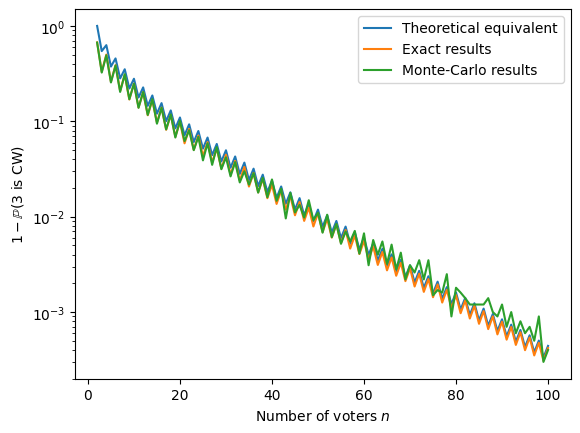

In [11]:
plot_simu_and_theo(
    equivalent_probas=equivalent_probas, monte_carlo_probas=monte_carlo_probas, exact_probas=exact_probas,
    ns_equivalent_probas=ns_equivalent_probas, ns_monte_carlo_probas=ns_monte_carlo_probas, ns_exact_probas=ns_exact_probas,
    y_label=r"$1 - \mathbb{P}(3 \text{ is CW})$",
    log_scale=True, file_name='mallows_3_first.tex', verbose=False
)